In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import itertools
import lightgbm as lgb

In [2]:
DIRECTORY = './data/'
categories = pd.read_csv(DIRECTORY + 'item_categories.csv')
items = pd.read_csv(DIRECTORY + 'items.csv')
shops = pd.read_csv(DIRECTORY + 'shops.csv')
train = pd.read_csv(DIRECTORY + 'sales_train.csv', parse_dates=['date'], date_format='%d.%m.%Y')
test = pd.read_csv(DIRECTORY + 'test.csv')

In [3]:
train['month'] = train['date'].dt.to_period('M')
october_items = train[train['month'] == pd.to_datetime('2014-10-01').to_period('M')]['item_id'].unique()
before_october_items =  train[train['month'] < pd.to_datetime('2014-10-01').to_period('M')]['item_id'].unique()
new_october = np.setdiff1d(october_items, before_october_items)

<Axes: xlabel='date'>

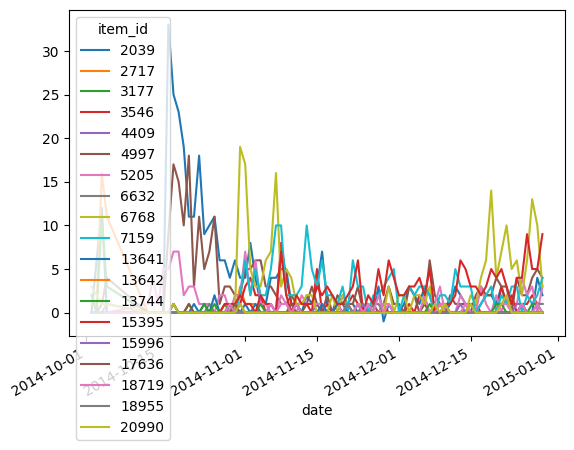

In [5]:
# graph the new october items sales (sample of 10) - until EOY
sample_new = np.random.choice(new_october, 20)
before_dec = train[train['date'] < pd.to_datetime('2014-12-30')].groupby(by=['date', 'item_id'])['item_cnt_day'].sum().to_frame('total_day').reset_index()
before_dec_new_oct = before_dec[before_dec['item_id'].isin(sample_new)]
before_dec_new_oct.pivot(index='date', columns='item_id', values='total_day').fillna(0).plot()